# S-Parameter and Power Project File Formats

The S-Parameter and power project is divided among 3 basic measurements that can be made with several systems. The system used frequently determines the file formats involved.

## One Port S-Parameters
A Standard protocol for measuring One-Port S-parameters is:
1. First "calibrate" the system. Almost all systems used to measure One-Port S-parameters have 2 ports, so the calibration technique can either be two One-Port Calibrations (Short-Open-Load) or a single Two port calibration (SOLT or Multiline Thru-Reflect-Load or Line-Refelect-Line). This Calibration is generally formed by using an HP Basic program, such as MeasLP or MultiCal. The set of knowns used is called a Cal-Set and generally has a single model number. The constituents of the Cal-Set are known as Calibration Standards. Each Cal-Set generally contains 3 or more calibration standards. The files required to do this are not typically saved, the calibration is loaded back onto the measurement machine (such as a PNA). These are the files that need to be saved to compare old methods to the Microwave Uncertaininty Framework.
2. Measure 3x Connects of a known sample(s), normally a check standard(s), using a HP Basic program such as MeasLP, on both port 1 and port 2. These files have been saved in the past as BDAT, an HP binary form. Currently Ron Ginley has written a converter to change these to a MS-DOS ascii format. Check standards are simply devices not included in the cal-set or cal-kit that have been measured many times. Each port is checked with one or more check standards, if the resulting measurements are close to the historical average of the checkstandard then the calibration is deemed to be good. To check the measurements they are typically analyzed using a HP Basic program such as Calrep7.1_Comma that generates a set of plots to compare to history. The analyzed data (with errors) is not typically saved, but can be. If the analysis result is saved it generates a file with the extension .asc for ascii and a single table with .txt extension containing the same data (but with less metadata) in comma seperated values. The data is in magnitude-angle format with 4 error columns each. If this check does not yield staisfactory results return to step 1.
3. Measure 3x connects of device under test on each port. This is done using MeasLP or similar with the calibration saved on the instrument. The data is saved in BDAT, then analyzed using Calrep. The output is then an .asc file and a single .txt table with the device id as the name of the file. Note: There is sometimes a file with a .dut extension that has the same data, except with ! for comments and space delimited (nominally the touchstone format .s1p with an option line # GHz MA S R 50, except followed by the 8 error columns.
4. Create a report from the .asc files?


In [1]:
#Example of one-port data files
# First we import all classes from the module that handles the data formats 
from pyMeasure.Code.DataHandlers.NISTModels import *
# Now we change the current workign directory to one with test files in it
os.chdir(TESTS_DIRECTORY)
# We can now open a file for a device under test from step 3, the raw file without error analysis 
# This has been converted using Ron Ginley's converter
one_port_raw_file='OnePortRawTestFile.txt'

In [2]:
one_port=OnePortRawModel(one_port_raw_file)
# The text representation of the file
print one_port

#System I
#A
#Type N Fem
#Type N
#1-port
#8 Jun 2000
#16:27:53
#MEAS95
#960910.143
#afm
#C980810.a1
#10 Aug 1998
#1
#3
#1
#1
#28
#7
#n ck std open
#CTN112
Frequency,Direction,Connect,magS11,argS11,magS22,argS22
0.01000,1,1,0.9996,-0.47,0.0000,0.00
0.01000,1,2,0.9996,-0.48,0.0000,0.00
0.01000,1,3,0.9996,-0.48,0.0000,0.00
0.02000,1,1,1.0001,-0.91,0.0000,0.00
0.02000,1,2,1.0001,-0.92,0.0000,0.00
0.02000,1,3,1.0001,-0.92,0.0000,0.00
0.03000,1,1,0.9998,-1.35,0.0000,0.00
0.03000,1,2,0.9998,-1.35,0.0000,0.00
0.03000,1,3,0.9998,-1.35,0.0000,0.00
0.04000,1,1,0.9997,-1.80,0.0000,0.00
0.04000,1,2,0.9997,-1.80,0.0000,0.00
0.04000,1,3,0.9997,-1.80,0.0000,0.00
0.05000,1,1,0.9998,-2.25,0.0000,0.00
0.05000,1,2,0.9998,-2.25,0.0000,0.00
0.05000,1,3,0.9998,-2.25,0.0000,0.00
0.06000,1,1,0.9999,-2.70,0.0000,0.00
0.06000,1,2,0.9999,-2.70,0.0000,0.00
0.06000,1,3,0.9999,-2.70,0.0000,0.00
0.07000,1,1,1.0000,-3.15,0.0000,0.00
0.07000,1,2,0.9999,-3.15,0.0000,0.00
0.07000,1,3,0.9999,-3.15,0.0000,0.00
0.08000,1,1,

<IPython.core.display.Javascript object>


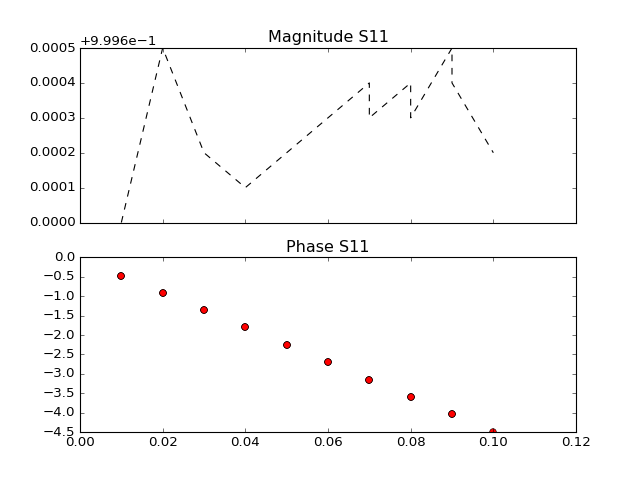

In [3]:
%matplotlib notebook
# A simple plot
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(one_port.get_column('Frequency'),one_port.get_column('magS11'),'k--')
ax0.set_title('Magnitude S11')
ax1.plot(one_port.get_column('Frequency'),one_port.get_column('argS11'),'ro')
ax1.set_title('Phase S11')
plt.show()

In [5]:
# An example of the file after error analysis in step 3
one_port_calrep='700437.asc'
one_port_analyzed=OnePortCalrepModel(one_port_calrep)

In [6]:
# The text representation of the file
print one_port_analyzed

#700437										
#16-Oct-15										
Frequency,mag,uMb,uMa,uMd,uMg,arg,uAb,uAa,uAd,uAg
0.0100,0.0028,0.0146,0.0025,0.0003,0.0295,-151.89,146.06,0.14,7.75,180.00
0.0200,0.0039,0.0085,0.0025,0.0001,0.0178,-126.17,100.15,0.14,1.78,180.00
0.0300,0.0055,0.0068,0.0025,0.0000,0.0146,-116.97,65.45,0.14,0.72,130.91
0.0400,0.0071,0.0061,0.0025,0.0000,0.0132,-112.73,47.02,0.14,0.21,94.05
0.0500,0.0088,0.0057,0.0025,0.0000,0.0125,-110.42,36.18,0.14,0.39,72.35
0.0600,0.0105,0.0055,0.0025,0.0000,0.0121,-109.65,29.50,0.14,0.11,59.01
0.0700,0.0122,0.0054,0.0025,0.0000,0.0119,-109.50,24.91,0.14,0.14,49.82
0.0800,0.0139,0.0053,0.0025,0.0000,0.0117,-109.48,21.53,0.14,0.14,43.06
0.0900,0.0155,0.0052,0.0025,0.0000,0.0116,-109.85,19.06,0.14,0.03,38.12
0.1000,0.0172,0.0052,0.0025,0.0000,0.0115,-110.63,17.06,0.14,0.05,34.11
0.1500,0.0254,0.0050,0.0025,0.0000,0.0113,-115.12,11.34,0.14,0.02,22.68
0.2000,0.0331,0.0050,0.0025,0.0000,0.0112,-120.72,8.62,0.14,0.01,17.23
0.2500,0.0403,0.0050,0.0025,0.0000,0.0111,-

<IPython.core.display.Javascript object>


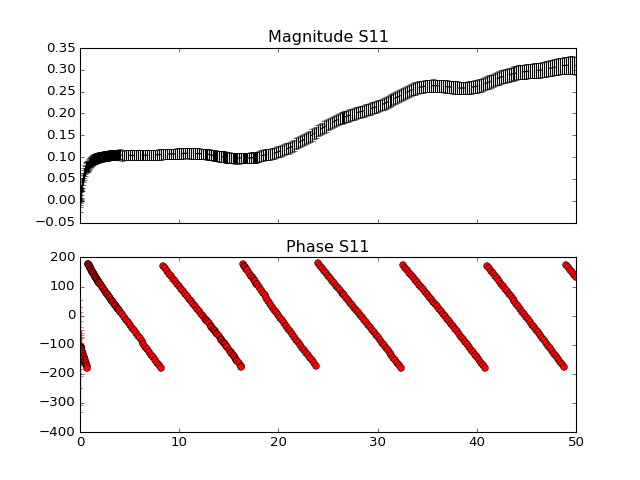

In [7]:
%matplotlib notebook
# A simple plot
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(one_port_analyzed.get_column('Frequency'),one_port_analyzed.get_column('mag'),
             yerr=one_port_analyzed.get_column('uMg'),fmt='k--')
ax0.set_title('Magnitude S11')
ax1.errorbar(one_port_analyzed.get_column('Frequency'),one_port_analyzed.get_column('arg'),
             yerr=one_port_analyzed.get_column('uAg'),fmt='ro')
ax1.set_title('Phase S11')
plt.show()

In [8]:
# Changing the text representation is easy, if for example a format that looks more touchstone like is 
# desired we can change some options
one_port_analyzed.options["data_delimiter"]='  '
one_port_analyzed.options["comment_begin"]='!'
one_port_analyzed.options["column_names_begin_token"]='!'
one_port_analyzed.options["column_names_delimiter"]='  '
print one_port_analyzed

!700437										
!16-Oct-15										
!Frequency  mag  uMb  uMa  uMd  uMg  arg  uAb  uAa  uAd  uAg
0.0100  0.0028  0.0146  0.0025  0.0003  0.0295  -151.89  146.06  0.14  7.75  180.00
0.0200  0.0039  0.0085  0.0025  0.0001  0.0178  -126.17  100.15  0.14  1.78  180.00
0.0300  0.0055  0.0068  0.0025  0.0000  0.0146  -116.97  65.45  0.14  0.72  130.91
0.0400  0.0071  0.0061  0.0025  0.0000  0.0132  -112.73  47.02  0.14  0.21  94.05
0.0500  0.0088  0.0057  0.0025  0.0000  0.0125  -110.42  36.18  0.14  0.39  72.35
0.0600  0.0105  0.0055  0.0025  0.0000  0.0121  -109.65  29.50  0.14  0.11  59.01
0.0700  0.0122  0.0054  0.0025  0.0000  0.0119  -109.50  24.91  0.14  0.14  49.82
0.0800  0.0139  0.0053  0.0025  0.0000  0.0117  -109.48  21.53  0.14  0.14  43.06
0.0900  0.0155  0.0052  0.0025  0.0000  0.0116  -109.85  19.06  0.14  0.03  38.12
0.1000  0.0172  0.0052  0.0025  0.0000  0.0115  -110.63  17.06  0.14  0.05  34.11
0.1500  0.0254  0.0050  0.0025  0.0000  0.0113  -115.12  11.34  0.14  0.02 

In [9]:
# or just getting the raw data
print one_port_analyzed.get_data_string()

0.0100  0.0028  0.0146  0.0025  0.0003  0.0295  -151.89  146.06  0.14  7.75  180.00
0.0200  0.0039  0.0085  0.0025  0.0001  0.0178  -126.17  100.15  0.14  1.78  180.00
0.0300  0.0055  0.0068  0.0025  0.0000  0.0146  -116.97  65.45  0.14  0.72  130.91
0.0400  0.0071  0.0061  0.0025  0.0000  0.0132  -112.73  47.02  0.14  0.21  94.05
0.0500  0.0088  0.0057  0.0025  0.0000  0.0125  -110.42  36.18  0.14  0.39  72.35
0.0600  0.0105  0.0055  0.0025  0.0000  0.0121  -109.65  29.50  0.14  0.11  59.01
0.0700  0.0122  0.0054  0.0025  0.0000  0.0119  -109.50  24.91  0.14  0.14  49.82
0.0800  0.0139  0.0053  0.0025  0.0000  0.0117  -109.48  21.53  0.14  0.14  43.06
0.0900  0.0155  0.0052  0.0025  0.0000  0.0116  -109.85  19.06  0.14  0.03  38.12
0.1000  0.0172  0.0052  0.0025  0.0000  0.0115  -110.63  17.06  0.14  0.05  34.11
0.1500  0.0254  0.0050  0.0025  0.0000  0.0113  -115.12  11.34  0.14  0.02  22.68
0.2000  0.0331  0.0050  0.0025  0.0000  0.0112  -120.72  8.62  0.14  0.01  17.23
0.2500  0.04

## Two-port S-parameters
A Standard protocol for measuring Two-Port S-parameters is:
1. First "calibrate" the system. Typcially a single Two port calibration (Short Open Load Thru or Multiline Thru-Reflect-Load or Line-Refelect-Line). This Calibration is generally formed by using the HP Basic program MultiCal.The files required to do this are not typically saved, the calibration is loaded back onto the measurement machine (such as a PNA). These are the files that need to be saved to compare old methods to the Microwave Uncertaininty Framework.
2. Measure 3x Connects of a known sample(s), normally a check standard(s), using a HP Basic program such as MeasLP, on both in foward and reverse positions (normally needs an adapter). This adapter is accounted for by measuring it and entering the data in MultiCal (during step 1). These files have been saved in the past as BDAT, an HP binary form. Currently Ron Ginley has written a converter to change these to a MS-DOS ascii format. Each port is checked with one or more check standards, if the resulting measurements are close to the historical average of the checkstandard then the calibration is deemed to be good. To check the measurements they are typically analyzed using a HP Basic program such as Calrep7.1_Comma that generates a set of plots to compare to history. The analyzed data (with errors) is not typically saved, but can be. If the analysis result is saved it generates a file with the extension .asc for ascii and and 3 tables with a.txt,b.txt, and c.txt extensions containing the same data (but with less metadata) in comma seperated values. The data is in magnitude-angle format with 4 error columns each. If this check does not yield staisfactory results return to step 1. The data is essentially 3 separate tables, S11, S22, and S21 in that order. S21 is always in db-Angle format, however the model atomatically converts the error and values to mag-angle if the constant CONVERT_S21=True for the NISTModels Module
3. Measure 3x connects of device under test on each port. This is done using MeasLP or similar with the calibration saved on the instrument. The data is saved in BDAT, then analyzed using Calrep. The output is then an .asc file and a 3 .txt tables with the device id as the name of the file. 
4. Create a report from the .asc files?

In [10]:
# example of 2-port raw files
two_port_raw_file='TestFileTwoPortRaw.txt'
two_port=TwoPortRawModel(two_port_raw_file)

In [11]:
print two_port

#HP8510      
#L 
#          
#N      
#2-port         
# 9 Sep 2015    
#10:31:55  
#MEASLP    
#150122    
#BFR       
#c050211.a2     
#               
# 1
# 3
# 1
#  4
#  53
#  7
#CHECK STANDARD 20 dB ATTEN                                  
#CTN208              
Frequency,Direction,Connect,magS11,argS11,magS21,argS21,magS22,argS22
0.10000,1,1,0.0154,169.13,19.6672,-7.22,0.0049,154.91
0.10000,1,2,0.0154,169.08,19.6676,-7.21,0.0049,155.14
0.10000,1,3,0.0154,169.12,19.6667,-7.21,0.0048,155.07
0.15000,1,1,0.0148,168.13,19.6685,-10.79,0.0048,134.68
0.15000,1,2,0.0148,168.03,19.6691,-10.79,0.0048,134.94
0.15000,1,3,0.0148,168.09,19.6685,-10.79,0.0048,134.93
0.20000,1,1,0.0150,160.94,19.6698,-14.36,0.0052,125.59
0.20000,1,2,0.0150,160.90,19.6706,-14.36,0.0052,125.78
0.20000,1,3,0.0150,160.98,19.6700,-14.36,0.0052,125.73
0.25000,1,1,0.0148,158.35,19.6728,-17.92,0.0056,118.26
0.25000,1,2,0.0148,158.33,19.6734,-17.92,0.0056,118.47
0.25000,1,3,0.0149,158.42,19.6730,-17.92,0.0056,118.47
0.3000

<IPython.core.display.Javascript object>


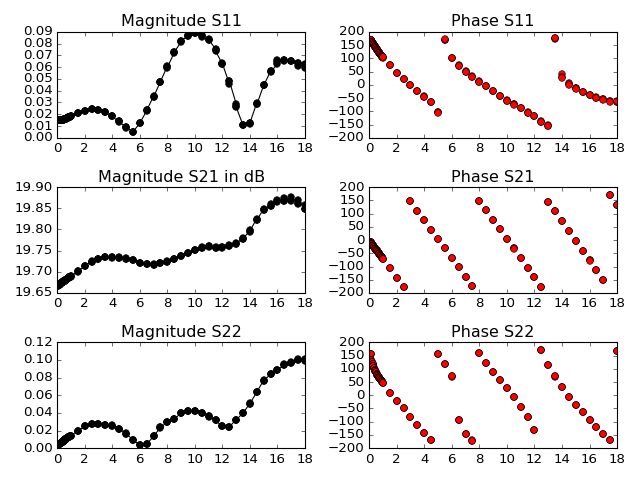

In [12]:
# add two.port.show() that does this (done 04/12/2016)!
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flat
ax0.plot(two_port.get_column('Frequency'),two_port.get_column('magS11'),'k-o')
ax0.set_title('Magnitude S11')
ax1.plot(two_port.get_column('Frequency'),two_port.get_column('argS11'),'ro')
ax1.set_title('Phase S11')
ax2.plot(two_port.get_column('Frequency'),two_port.get_column('magS21'),'k-o')
ax2.set_title('Magnitude S21 in dB')
ax3.plot(two_port.get_column('Frequency'),two_port.get_column('argS21'),'ro')
ax3.set_title('Phase S21')
ax4.plot(two_port.get_column('Frequency'),two_port.get_column('magS22'),'k-o')
ax4.set_title('Magnitude S22')
ax5.plot(two_port.get_column('Frequency'),two_port.get_column('argS22'),'ro')
ax5.set_title('Phase S22')
plt.tight_layout()
plt.show()

In [16]:
# Example of 2 port after analysis
two_port_calrep_file='922729.asc'
# Change name to TwoPortCalrepModel!!
two_port_analyzed=TwoPortCalrepModel(two_port_calrep_file)

strip_line_tokens failed to strip None,None from 



In [17]:
# this model is actually 4 tables, but there is also a joined table
print("The table names are {0}".format(two_port_analyzed.table_names))
print two_port_analyzed.tables[1]
#print two_port_analyzed.joined_table

The table names are ['header', 'S11', 'S22', 'S21']
#922729
#25 Jun 2013
Frequency,magS11,uMbS11,uMaS11,uMdS11,uMgS11,argS11,uAbS11,uAaS11,uAdS11,uAgS11
0.0500,0.0050,0.0047,0.0005,0.0000,0.0095,-15.02,49.76,0.03,0.52,99.53
0.1000,0.0052,0.0043,0.0005,0.0000,0.0086,2.38,42.59,0.03,0.29,85.18
0.5000,0.0068,0.0041,0.0005,0.0000,0.0082,11.40,32.34,0.03,0.06,64.68
1.0000,0.0078,0.0041,0.0006,0.0000,0.0082,13.85,28.48,0.03,0.10,56.97
1.5000,0.0079,0.0041,0.0006,0.0000,0.0083,15.33,28.21,0.03,0.13,56.42
2.0000,0.0067,0.0041,0.0006,0.0000,0.0083,-4.10,32.62,0.03,0.12,65.24
2.5000,0.0086,0.0041,0.0006,0.0000,0.0083,-14.96,26.12,0.04,0.07,52.24
3.0000,0.0095,0.0041,0.0006,0.0000,0.0084,-12.59,24.04,0.04,0.04,48.08
3.5000,0.0098,0.0042,0.0007,0.0000,0.0084,-18.31,23.42,0.04,0.08,46.84
4.0000,0.0112,0.0042,0.0007,0.0000,0.0085,-24.64,20.60,0.04,0.15,41.19
4.5000,0.0118,0.0042,0.0007,0.0000,0.0085,-26.33,19.61,0.04,0.18,39.22
5.0000,0.0109,0.0042,0.0007,0.0000,0.0086,-34.48,21.31,0.04,0.18,42.61
5

<IPython.core.display.Javascript object>


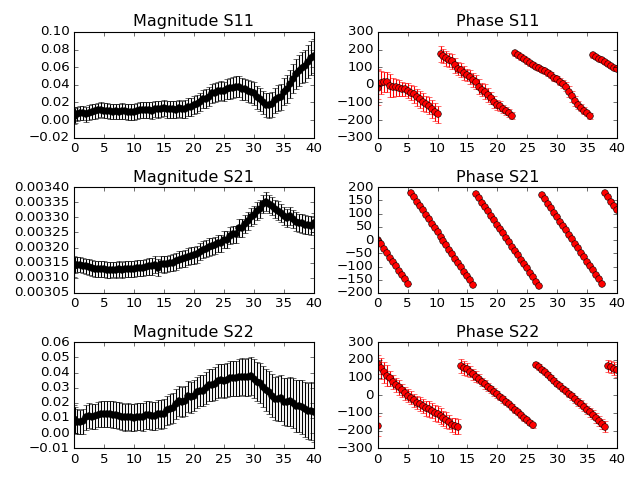

In [18]:
# add two_port.show() that does this (done 04/12/2016)!
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flat
ax0.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('magS11'),
             yerr=two_port_analyzed.joined_table.get_column('uMgS11'),fmt='k-o')
ax0.set_title('Magnitude S11')
ax1.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('argS11'),
             yerr=two_port_analyzed.joined_table.get_column('uAgS11'),fmt='ro')
ax1.set_title('Phase S11')
ax2.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('magS21'),
             yerr=two_port_analyzed.joined_table.get_column('uMgS21'),fmt='k-o')
ax2.set_title('Magnitude S21')
ax3.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('argS21'),
             yerr=two_port_analyzed.joined_table.get_column('uAgS21'),fmt='ro')
ax3.set_title('Phase S21')
ax4.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('magS22'),
             yerr=two_port_analyzed.joined_table.get_column('uMgS22'),fmt='k-o')
ax4.set_title('Magnitude S22')
ax5.errorbar(two_port_analyzed.joined_table.get_column('Frequency'),two_port_analyzed.joined_table.get_column('argS22'),
             yerr=two_port_analyzed.joined_table.get_column('uAgS22'),fmt='ro')
ax5.set_title('Phase S22')
plt.tight_layout()
plt.show()

## Power Measurements
The situation for power measurements is more complicated, there are 2 types of power measurement
### Direct Comparison
### Six-port Power Measurement

In [20]:
# a power DUT
power_file='700196.asc'
power=PowerCalrepModel(power_file)

strip_line_tokens failed to strip None,None from 



In [21]:
print power.joined_table

#700196
# 8 Jan 2013
Frequency,mag,uMb,uMa,uMd,uMg,arg,uAb,uAa,uAd,uAg,Efficiency,uEb,uEa,uEd,uEg,Calibration_Factor,uCb,uCa,uCd,uCg
8.4000,0.0724,0.0017,0.0015,0.0002,0.0046,-146.94,1.36,0.09,0.19,2.73,0.9836,0.005,0.002,0.0006,0.0108,0.9785,0.0052,0.002,0.0006,0.0112
8.5000,0.0502,0.0017,0.0015,0.0003,0.0046,-163.70,1.94,0.09,0.28,3.90,0.9825,0.005,0.002,0.0007,0.0108,0.9801,0.0052,0.002,0.0006,0.0111
8.6000,0.0343,0.0017,0.0015,0.0003,0.0046,173.49,2.81,0.09,0.67,5.65,0.9828,0.005,0.002,0.0006,0.0108,0.9817,0.0051,0.002,0.0006,0.011
8.8000,0.0222,0.0017,0.0015,0.0006,0.0046,96.56,4.27,0.09,0.55,8.55,0.9814,0.005,0.002,0.0006,0.0108,0.9809,0.0051,0.002,0.0006,0.0109
9.0000,0.0346,0.0017,0.0015,0.0008,0.0046,47.27,2.79,0.09,0.66,5.60,0.9793,0.005,0.002,0.0011,0.0108,0.9782,0.0051,0.002,0.0011,0.011
9.2000,0.0425,0.0017,0.0015,0.0010,0.0046,18.39,2.29,0.09,0.31,4.58,0.9702,0.005,0.002,0.0017,0.0108,0.9684,0.0051,0.002,0.0018,0.0111
9.4000,0.0476,0.0017,0.0015,0.0008,0.0046,13.99,2.05,0

<IPython.core.display.Javascript object>


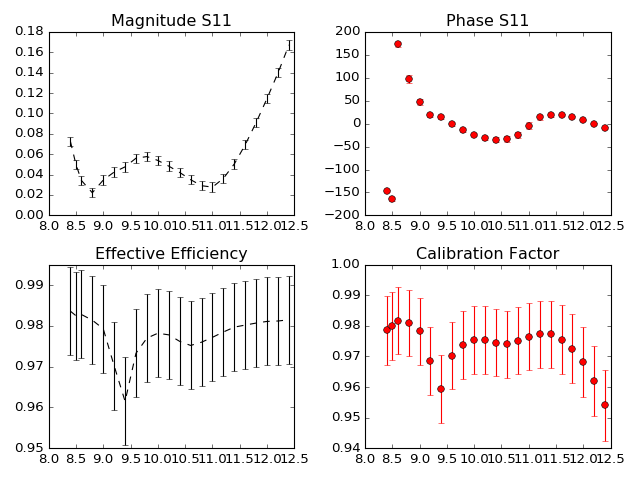

In [22]:
# A simple plot
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.errorbar(power.joined_table.get_column('Frequency'),power.joined_table.get_column('mag'),
             yerr=power.joined_table.get_column('uMg'),fmt='k--')
ax0.set_title('Magnitude S11')
ax1.errorbar(power.joined_table.get_column('Frequency'),power.joined_table.get_column('arg'),
             yerr=power.joined_table.get_column('uAg'),fmt='ro')
ax1.set_title('Phase S11')
ax2.errorbar(power.joined_table.get_column('Frequency'),power.joined_table.get_column('Efficiency'),
             yerr=power.joined_table.get_column('uEg'),fmt='k--')
ax2.set_title('Effective Efficiency')
ax3.errorbar(power.joined_table.get_column('Frequency'),power.joined_table.get_column('Calibration_Factor'),
             yerr=power.joined_table.get_column('uCg'),fmt='ro')
ax3.set_title('Calibration Factor')
plt.tight_layout()
plt.show()